# Predicting the price of bull dozers using Machine Learning

In this project we're going to go through an example machine learning project with the goal of predicting the sale price of bull-dozers.

### 1. Problem Definition
> How well can we predict the future sale price of bull dozer, given its characteristics and previous examples of how much similar bull dozers have been sold off.

### 2. Data
> The data is from Kaggle's Blue book for bulldozers competition: `(https://www.kaggle.com/competitions/bluebook-for-bulldozers/data)`

### 3. Evaluation
> The evaluation metrics is RMSLE (root mean squared log error) between the actual and predicted auction prices.

### 4. Features
> Kaggle provides a data dictionary detailing all of the features of the dataset: `https://www.kaggle.com/competitions/bluebook-for-bulldozers/data`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [150]:
# import training and validation sets

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv")
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14268\535884130.py:3: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv")


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [130]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

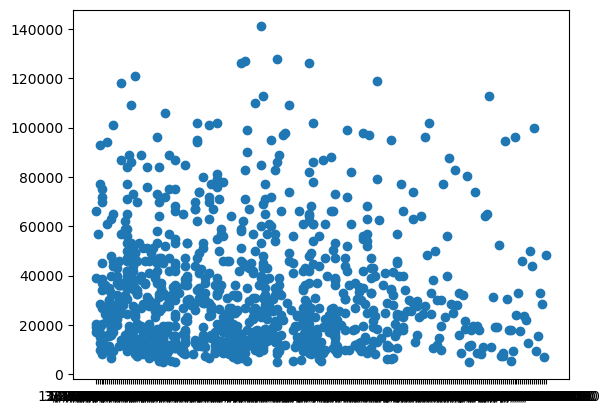

In [6]:
fig, ax = plt.subplots()

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

[]

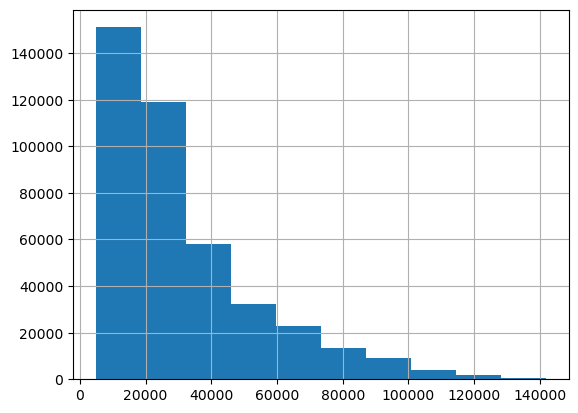

In [7]:
df["SalePrice"].hist().plot()

In [26]:
df["saledate"][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

## Parsing dates
When working with time series data, we want to enrich our date and time component.
We can do so using `parse_dates` with pandas

In [152]:
# import data

df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates=["saledate"])
df['saledate'].dtype

dtype('<M8[ns]')

In [153]:
df['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

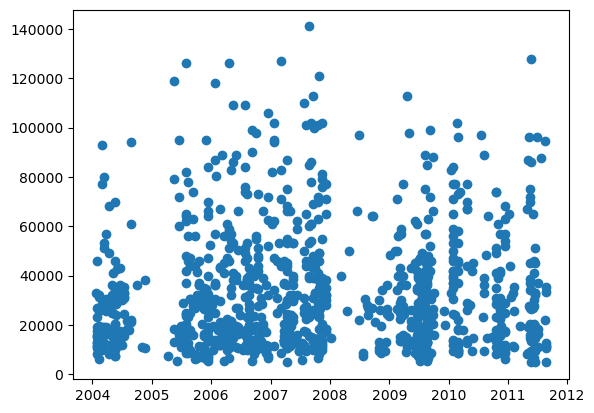

In [133]:
fig, ax = plt.subplots()

ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [134]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


## Sort dataframe by saledate

When working with time series data, it's always a good practice to sort dataframe by date.

In [154]:
df.sort_values(by=["saledate"], ascending=True, inplace=True)
df['saledate'].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of original dataframe 

We make a copy of original dataframe so when we manipulate the copy, we still have our original data.

In [155]:
# make a copy

df_temp = df.copy()

In [156]:
df_temp['saledate'].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Add datetime parameter for `saledate` column

In [157]:
df_temp["saleyear"] = df_temp["saledate"].dt.year
df_temp["salemonth"] = df_temp["saledate"].dt.month
df_temp["saleday"] = df_temp["saledate"].dt.day
df_temp["saledayofweek"] = df_temp["saledate"].dt.dayofweek
df_temp["saledayofyear"] = df_temp["saledate"].dt.dayofyear

df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [158]:
# since, we have enriched the dataframe with datetime parameters, we can now drop the saledate column
df_temp.drop('saledate', axis=1, inplace=True)

In [159]:
# check values of different columns
df_temp['state'].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

### Modelling
Let's do some model-driven exploratory data analysis.

In [160]:
# convert string to numbers

df_temp.info()

# pd.api.types.is_string_dtype(df_temp["UsageBand"])

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [161]:
# find the columns which contains string

object_cols = df_temp.select_dtypes(include=['object']).columns
object_cols

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [162]:
# now convert string values to numbers
# missing values converted to -1 ( using cat.codes )

for col in object_cols:
    df_temp[col] = df_temp[col].astype('category').cat.codes + 1

In [163]:
# handle missing values

df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                        0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc                  0
fiModelSeries                    0
fiModelDescriptor                0
ProductSize                      0
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                     0
Enclosure                        0
Forks                            0
Pad_Type                         0
Ride_Control                     0
Stick                            0
Transmission                     0
Turbocharged                     0
Blade_Extension                  0
Blade_Width         

## Export pre-processed data

In [168]:
# export pre-processed data

df_temp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)


In [169]:
# import pre-processed data

df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv")

In [170]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                        0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc                  0
fiModelSeries                    0
fiModelDescriptor                0
ProductSize                      0
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                     0
Enclosure                        0
Forks                            0
Pad_Type                         0
Ride_Control                     0
Stick                            0
Transmission                     0
Turbocharged                     0
Blade_Extension                  0
Blade_Width         

In [171]:
# fill missing values
# fill in the numerical missing values first

# for label, content in df_tmp.items():
#     if pd.api.types.is_numeric_dtype(content):
#         print(label)

In [172]:
df_tmp["ModelID"]

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [173]:
# check for which numeric columns have missing values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [174]:
# fill numeric rows with median

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            # add binary column
            df_tmp[label +"_is_missing"] = pd.isnull(content)
            
            # fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [175]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [177]:
df_tmp['auctioneerID_is_missing'].value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [ ]:
# fill categorical values to numbers

# for label, content in df_tmp.items():
#     if not pd.api.types.is_numeric_dtype(content):
        
#         # add binary column 
#         df_tmp[label + "_is_missing"] = pd.isnull(content)
        
#         # turn categories into numbers ( add plus 1 because the missing values are turned into -1)
#         df_temp[label] = pd.Categorical(content).codes + 1

In [178]:
df_tmp["UsageBand"].value_counts()

UsageBand
0    339028
3     35832
2     25311
1     12527
Name: count, dtype: int64

In [179]:
# fitting a machine learning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# split data into X and y
X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp['SalePrice']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [ ]:

model.score(X_test, y_test)

0.9066965301830008

In [186]:
# build evaluation function

from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_true, y_preds):
    """
    Calculates root mean squared log error between true labels and predictions
    """
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

In [ ]:
y_preds = model.predict(X_test)
rmsle(y_test, y_preds)


np.float64(0.21367481365041838)

In [190]:
# use max_samples to limit draw - from train sets to reduce train-time

### Feature Importance

It seeks to figure out which attributes of data were more important when it comes to predicting `target variable`

In [205]:
# find feature importance of our model

# it give values for each column in our dataset
model.feature_importances_
len(model.feature_importances_), len(X_train.columns)

(58, 58)

In [213]:
# plot feature importance 
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, 
                        "feature_importance": importances
                        }).sort_values("feature_importance", ascending=False).reset_index(drop=True))
    
    # plot the df
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:20])
    ax.set_xlabel("Features")
    ax.set_ylabel("Feature Importance")
    ax.invert_yaxis()

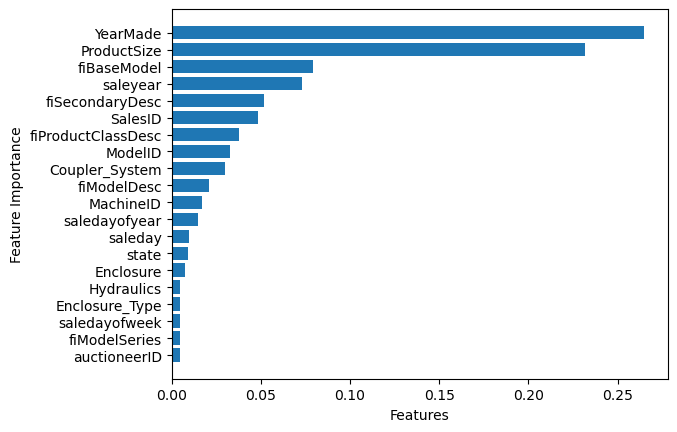

In [214]:
plot_features(X_train.columns, model.feature_importances_)